<a href="https://colab.research.google.com/github/justin-hill426/MachineLearningPractice/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Built with help and guidance from Udacity's 'Intro to Deep Learning using TensorFlow course'. It's a great course if you get a second to check it out.**

In [ ]:
import tensorflow as tf
#Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import math
import numpy as np
import matplotlib.pyplot as plt
import logging

logger=tf.get_logger()
logger.setLevel(logging.ERROR)

#Intro
Fashion MNIST is basically the Hello World of Machine Learning. It is a dataset of images that can be classified into 10 labeled categories. It contains 60,000 training images and 10,000 test images. Each image is a grayscale 28x28 depiction of the object.

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteQG3DSD/fashion_mnist-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteQG3DSD/fashion_mnist-test.tfrecord
Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


## Get Labels

In [ ]:
class_names = metadata.features['label'].names
print('Class names: {}'.format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Explore the data
See how the data is split between training data and testing data: 60000 to 10000.

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of testing examples: {}'.format(num_train_examples))
print('Nuber of test examples: {}'.format(num_test_examples))

Number of testing examples: 60000
Nuber of test examples: 10000


## Preprocess the Data
Each pixel in the image is in the range [0,255]. For the model to work properly, these values need to be normalized to the range [0,1]. 

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

#map applies to each element in the set
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

#cache to save speed on later runs
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

### What does the data look like?

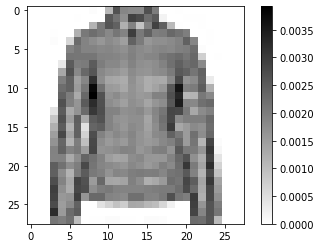

In [ ]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

#Plot the image
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()


*Display the first 25 images from the training set and display the class name below*

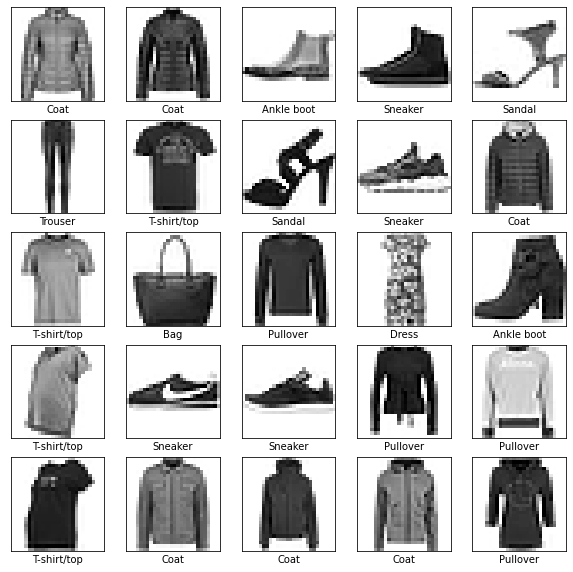

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(test_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

#Build the model
To build the model requires configuring the layers of the model, and then compiling the model.

#Setup the layers
Deep learning is all about chaining together some layers.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

The three layers for this model are as follows:

1. input layer - Transfers our input array from a 2d-array of pixels, to a 1d-array

2. hidden layer - Hidden dense layer that takes input from the first layer and weights the input, to pass on a single value to the next layer

3. output - each of the 10 nodes represent a class of clothing

#Compile the model
* Add loss function- how far are the model's outputs from the desired output.
* Add optimizer- an algorithm for adjusting the inner parameters in order to minimize loss
* Metrics- Used to monitor the training and testing steps. How many images are correctly classified?

In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

# Train the model

* Define iteration behavior for the dataset:
  1. Specify repitition
  2. Specify shuffle(), randomize the order so our model can't learn from the order of the examples
  3. We want to use batch gradient descent and dataset.batch(n) tells model.fit to use batchs of n images to update the variables
* Training is performed by model.fit:
  1. Feed the training data to th model using train_dataset
  2. The model learns to start associating images and labels
  3. The epochs = 5 parameter limits training to 5 full iterations of the training dataset, for a total of 5 * 60000 = 300000 examples.

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples)/BATCH_SIZE)

Epoch 1/5
1875/1875 [==============================] - 12s 2ms/step - loss: 1.0841 - accuracy: 0.6636
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6340 - accuracy: 0.7698
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5613 - accuracy: 0.7987
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5159 - accuracy: 0.8177
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4940 - accuracy: 0.8248


# Evaluate accuracy
Evaluate how the model performs on the test dataset.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples/32))
print("Accuracy on test dataset:", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.5067 - accuracy: 0.8198
Accuracy on test dataset: 0.8198000192642212


# Make predictions and explore

With the model trained, we can use it to make predictions about some images.

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

predictions[0]

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

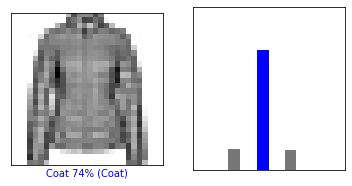

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

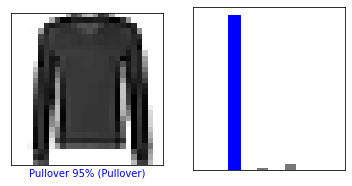

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

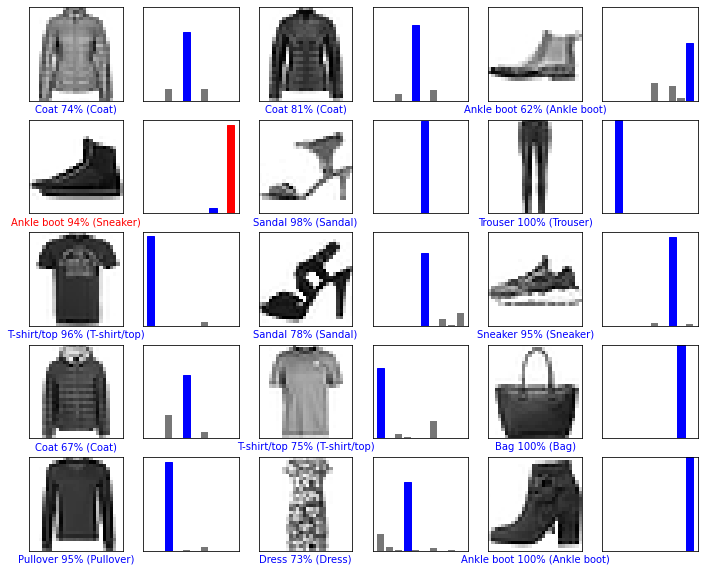

In [ ]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
